<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [17]:
# importando librerias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('ggplot')

In [18]:
# Cargando datos

dataset = pd.read_csv('./data/lugares.csv')
print(dataset.columns)

dataset.rename(columns={'Cuidado de la salud y el medio ambiente': 'Salud y Ambiente'}, inplace=True) # PARA MEJORAR GRÁFICAS

dataset.set_index('Ciudad', inplace=True)
dataset.head()

Index(['Ciudad', 'Clima y Terreno', 'Alojamiento',
       'Cuidado de la salud y el medio ambiente', 'Crimen', 'Transporte',
       'Educación', 'Artes', 'Recreación', 'Economía'],
      dtype='object')


,Clima y Terreno,Alojamiento,Salud y Ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


Se importan las librerias, se cargan los datos de la ruta especificada y se almacena en un df llamado dataset, se renombra la columna Cuidado de la salud y el medio ambiente, para facilitar su uso en graficos, se establece la columna ciudad como indice y se muestran las primeras 5 filas del df

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [19]:
# Análisis descriptivo
descriptive_stats = dataset.describe()
display(descriptive_stats.transpose())

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Salud y Ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


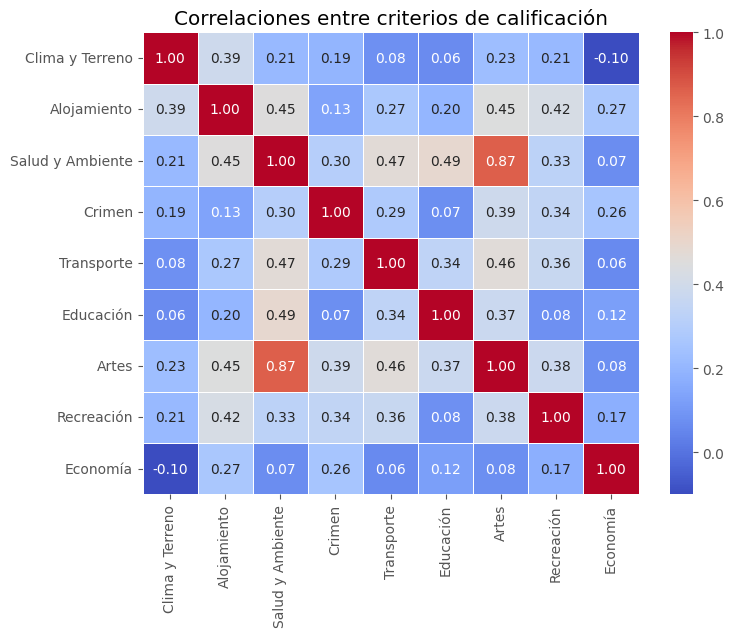

In [20]:
# Matriz de correlación
correlation_matrix = dataset.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlaciones entre criterios de calificación')
plt.show()

### Análisis de los Resultados Descriptivos y la Matriz de Correlación

#### Estadísticas Descriptivas

Al observar las estadísticas descriptivas de las variables:

- Clima y Terreno: tiene una media de 538.73 con una desviación estándar de 120.81, indicando una variabilidad moderada en la calificación de las ciudades en este criterio.
- Alojamiento: muestra una media de 8346.56 y una desviación estándar relativamente alta de 2385.26, lo que sugiere que hay una gran variabilidad en las puntuaciones de alojamiento entre las ciudades.
- Salud y Ambiente: también tiene una gran variabilidad, con un rango que va desde 43 hasta 7850.
- Crimen: tiene una media de 961.05 con una desviación estándar de 357.15, lo que indica una dispersión considerable en las puntuaciones de crimen.

Estas estadísticas son útiles para entender la distribución de los datos y detectar posibles outliers que podrían influir en el análisis de componentes principales (PCA).

#### Matriz de Correlación

Al analizar la matriz de correlación:

- Cuidado de la Salud y el Medio Ambiente y Artes tienen una alta correlación de 0.8658, lo que sugiere que las ciudades que puntúan alto en salud y medio ambiente también tienden a tener una alta calificación en artes.
- Alojamiento y Artes también están correlacionados con 0.4486, lo que indica una relación positiva moderada entre estos dos factores.
- Crimen y Artes tienen una correlación de 0.3895, lo que puede parecer contraintuitivo, pero podría reflejar una relación compleja entre la seguridad y las actividades culturales.

Estas correlaciones sugieren que hay algunas variables que están relacionadas entre sí, lo que es precisamente lo que el PCA tratará de simplificar, reduciendo la dimensionalidad del conjunto de datos.

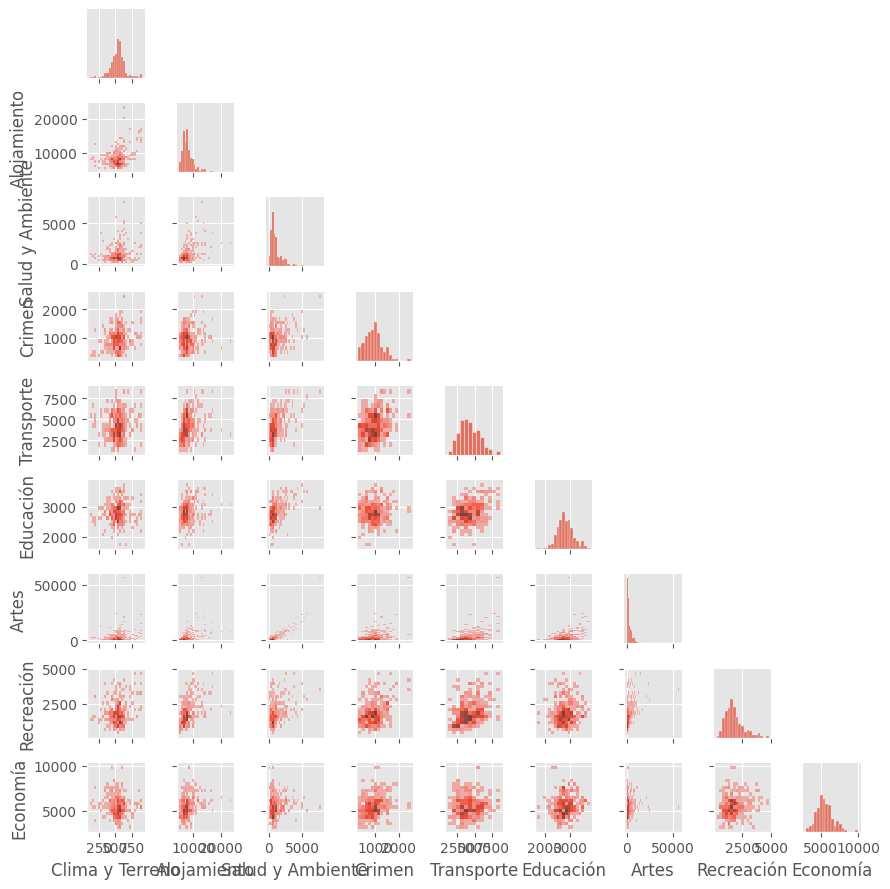

In [21]:
# PAIRPLOT - EJEMPLO
sns.pairplot(dataset, kind="hist", height = 1.0, corner=True)
plt.tight_layout()

#### Gráficas de Dispersión Bivariadas

Dado que se tienen 9 variables, la cantidad de gráficas de dispersión bivariadas se puede calcular como la combinación de 2 elementos de un conjunto de 9, asi:

$$
\binom{9}{2} = \frac{9 \times (9-1)}{2} = \frac{9 \times 8}{2} = 36
$$

Por lo tanto, se deber examinar 36 gráficas de dispersión bivariadas para estudiar todas las posibles relaciones entre las variables.

#### Importancia de las Estadísticas Descriptivas

Las estadísticas descriptivas ayudan a comprender la distribución y la tendencia central de cada variable en un conjunto de datos. Estas estadísticas permiten, entre otras cosas:

- Identificar si las variables tienen alguna distribución sesgada o si exiten valores atípicos que posiblemente afecten un análisis posterior
- Comprender la escala de las variables, dado que algunas pueden tener escalas diferentes las estadísticas descriptivas pueden ayudar a decidir si es necesario realizar un proceso para estandarizar las variables antes de aplicar el análisis de componentes principales. Esto puede llegar a ser importante pues el PCA es sensible a la escala de las variables.
- Evaluar la correlación entre las variables, pues permiten ver cómo están relacionadas las variables entre si, esto es de mucha ayuda en PCA ya que el objectivo principal es reducir la dimensionalidad basádos en la correlación entre las variables.

Lo anterior es un primer paso antes de realizar un PCA porque su las variables tienen diferentes unidades o escalas es necesario aplicar una normalización para que el PCA no esté sesgado hacia aquellas variables con mayores varianzas.
Adicionalmente revisando la varianza de las variables se puede identificar que variables tienen más peso en el conjunto de datos, el PCA identificara la direcciones (componentes principales) en las que la varianza es máxima, por lo que revisar esto antes nos puede ayudar a anticipar estos resultados. Adiconalmente el PCA busca los componentes que expliquen la mayot parte de la varianza de los datos. Por lo que si dos variables están altamente correlacionadas, probablemente contribuirán de manera similar a un componente principal y saber esto antes ayuda a realizar una mejor intrerpretación de los resultados.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

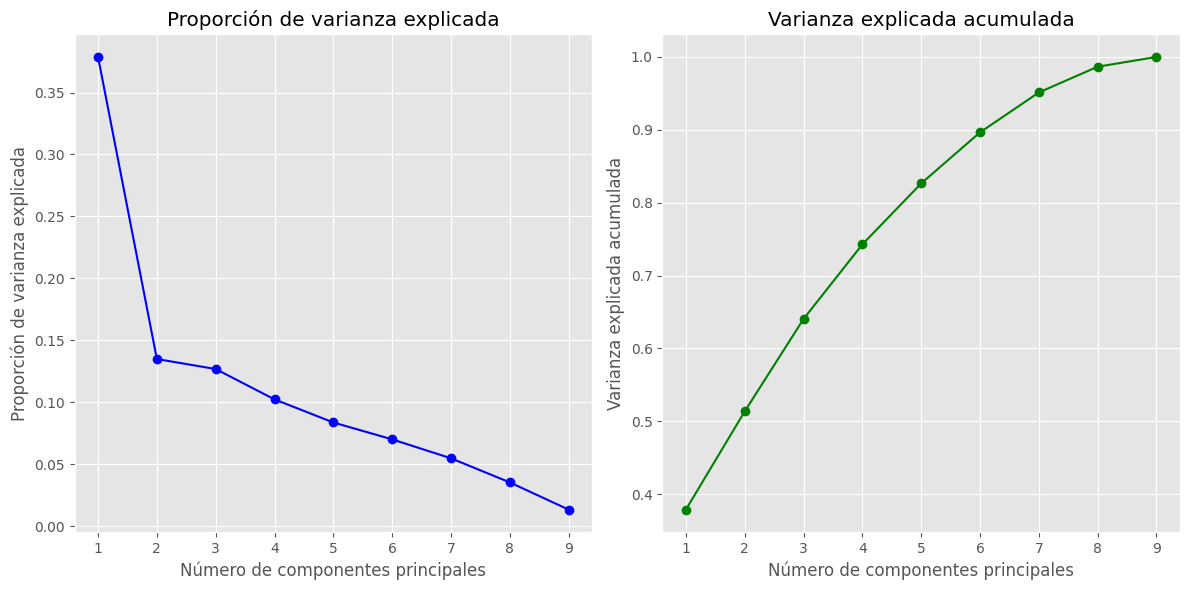

Número de componentes según el criterio de Kaiser: 3
 Eigenvalores: [3.4082918  1.21397617 1.14147915 0.92091782 0.75328488 0.6305619
 0.49304772 0.31803849 0.12040208]


In [22]:
# 3.1 ESTANDARIZAR DATOS - ¿SIEMPRE SE ESTANDARIZA CON MEDIA Y DESVIACIÓN? ¿SE PUEDEN UTILIZAR OTRAS TÉCNICAS? ¿DE QUE DEPENDE EL USO O NO DE ESTÁS TÉCNICAS?
mu = dataset.mean()
sigma = dataset.std()
Z = (dataset - mu) / sigma

# 3.2 CALCULAR MATRIZ COVARIANZA
cov_matrix = np.cov(Z, rowvar=False)

# 3.3 CALCULAR EIGENVALOR & EIGENVECTOR
eig_val, eig_vec = np.linalg.eig(cov_matrix)

# 3.4 TRANSPONER VECTOR
eig_vec = eig_vec.T 

# 3.5 VARIANZA EXPLICADA EN COMPONENTE
explained_var_ratio = eig_val / np.sum(eig_val)
cumulative_explained_var = np.cumsum(explained_var_ratio)

# 3.6 PROYECTAR LOS DATOS EN COMPONENTES PRINCIPALES
principal_components = Z.dot(eig_vec)

# 3.7 GRÁFICOS DE LÍNEAS UNO AL LADO DEL OTRO
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o', linestyle='-', color='blue')
axes[0].set_title('Proporción de varianza explicada')
axes[0].set_xlabel('Número de componentes principales')
axes[0].set_ylabel('Proporción de varianza explicada')
axes[0].grid(True)

axes[1].plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='o', linestyle='-', color='green')
axes[1].set_title('Varianza explicada acumulada')
axes[1].set_xlabel('Número de componentes principales')
axes[1].set_ylabel('Varianza explicada acumulada')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 3.9 CRITERIO DE KAISER
num_components_kaiser = np.sum(eig_val > 1)
print(f"Número de componentes según el criterio de Kaiser: {num_components_kaiser}\n Eigenvalores: {eig_val}")

La estandarización es crucial dado que cada variable tendrá una media de 0 y una desviación estándar de 1. Esto es importante para el PCA, ya que las variables con diferentes escalas pueden sesgar los resultados, dándole más peso a las variables con mayor varianza.

Con el umbral de la varianza explicada se deberían seleccionar entre 4 componentes correspondiente al 75% varianza de la varianza explciada y 6 componentes, 90% varianza de la varianza explicada. Por otro lado, según el critero de Kaiser se deberian seleccionar 3 valores <em>como mínimo</em>, dado que 3 eigenvalores son mayores que 1.

La selección se realiza intentado buscar un equilibrio entre la simplcidad del modelo y la cantidad de información a retener, una buena opción es optar por utilizar **4 componentes**, dado que cumple con las condiciones de varianza mínima explicada, (<em>valores entre 70% y 90%</em>) y cumple con el criterio de Kaiser.

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

C:\Users\Esteb\AppData\Local\Temp\ipykernel_37788\4075339111.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(loadings.columns, rotation=90)
C:\Users\Esteb\AppData\Local\Temp\ipykernel_37788\4075339111.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(loadings.columns, rotation=90)
C:\Users\Esteb\AppData\Local\Temp\ipykernel_37788\4075339111.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(loadings.columns, rotation=90)
C:\Users\Esteb\AppData\Local\Temp\ipykernel_37788\4075339111.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(loadings.columns, rotation=90)


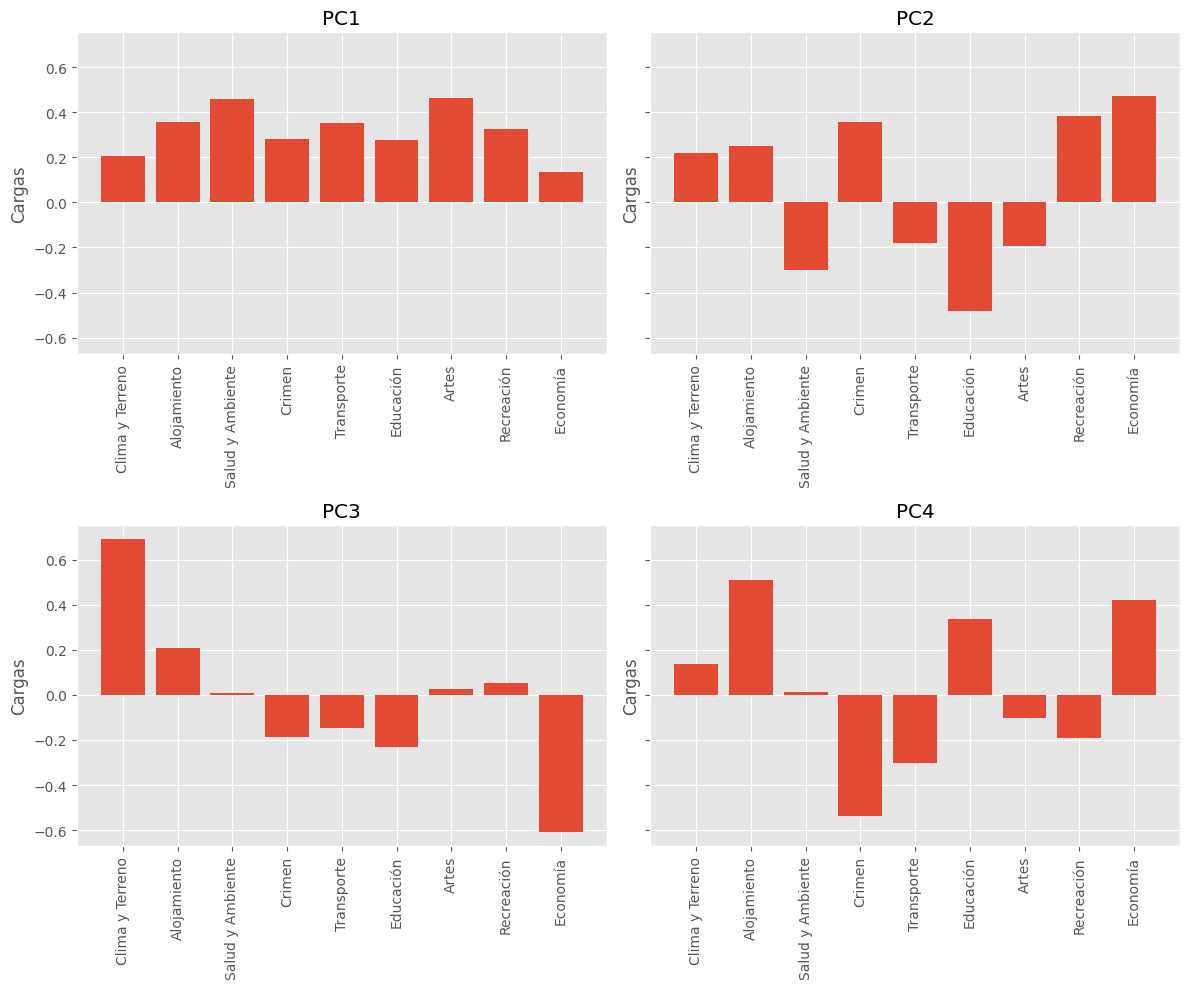

In [23]:
n_components = 4
loadings = pd.DataFrame(eig_vec[:n_components, :], columns=Z.columns, index=[f'PC{i+1}' for i in range(n_components)])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharey=True)
titles = [f'PC{i+1}' for i in range(0,n_components)]

for i, (ax, title) in enumerate(zip(axes.flatten(), titles)):
    ax.bar(loadings.columns, loadings.iloc[i])
    ax.set_title(title)
    ax.set_ylabel('Cargas')
    # ax.grid(True)
    ax.set_xticklabels(loadings.columns, rotation=90)

plt.tight_layout()
plt.show()

PC1: Calidad de vida centrada en cultura y salud, con desafíos en costo de vida y seguridad.
   - Artes, Salud y Ambiente, Transporte: Contribuyen positivamente a una mayor calidad de vida en términos culturales y de salud.
   - Alojamiento: Indica que un alto costo de vida puede estar asociado con una mejor oferta cultural y de salud.
   - Crimen: Aunque contradictorio, ciudades con alta calidad de vida cultural pueden enfrentar mayores desafíos de seguridad.

PC2: Contrapone desarrollo económico y recreativo con educación y seguridad.
   - Economía, Recreación: Altas cargas positivas reflejan ciudades con buen desarrollo económico y recreativo.
   - Educación: Carga negativa indica un potencial compromiso entre desarrollo económico y calidad educativa.
   - Crimen: Mayores oportunidades económicas podrían coincidir con mayores niveles de crimen.

PC3: Contraste entre clima favorable y menor desarrollo económico.
   - Clima y Terreno: Alto valor positivo sugiere que este componente se centra en ciudades con un clima favorable.
   - Economía: Carga negativa indica que un clima favorable puede estar relacionado con un menor desarrollo económico.

PC4: Relación entre alojamiento costoso, menor criminalidad y buen desarrollo económico.
   - Alojamiento: Indica que en ciudades con alojamiento más costoso, la criminalidad tiende a ser menor.
   - Economía: Carga positiva refleja un desarrollo económico fuerte en estas ciudades.

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [24]:
principal_components.columns = [f'PC{i+1}' for i in range(0,9)]
print(titles)
principal_components = principal_components[titles] # SE REALIZA EL FILTRO CON LOS COMPONENTES SELCCIONADOS

['PC1', 'PC2', 'PC3', 'PC4']


In [25]:
# CALCULA UN PUNTAJE GENERAL
weighted_scores = principal_components * explained_var_ratio[:n_components]
weighted_scores['overall_scores'] = weighted_scores.sum(axis=1)
top_cities = weighted_scores['overall_scores'].nlargest(5)

print('Top 5 ciudades con calidad de vida inusualmente alta:')
print(top_cities.index.tolist())

Top 5 ciudades con calidad de vida inusualmente alta:
['New-York,NY', 'Los-Angeles,Long-Beach,CA', 'San-Francisco,CA', 'Stamford,CT', 'Newark,NJ']


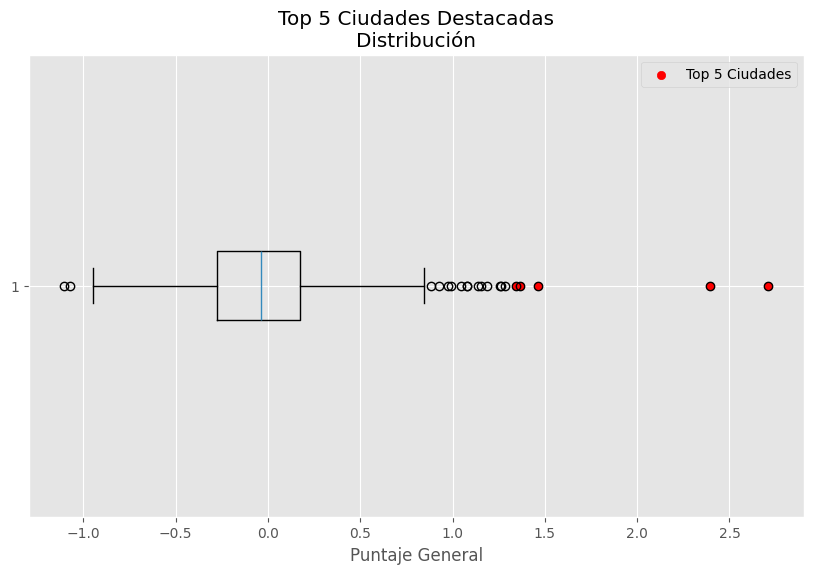

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(weighted_scores['overall_scores'], vert=False)
plt.scatter(top_cities.values, np.ones_like(top_cities.values), color='red', label='Top 5 Ciudades')
plt.title('Top 5 Ciudades Destacadas\nDistribución')
plt.xlabel('Puntaje General')
plt.legend()
plt.grid(True)
plt.show()

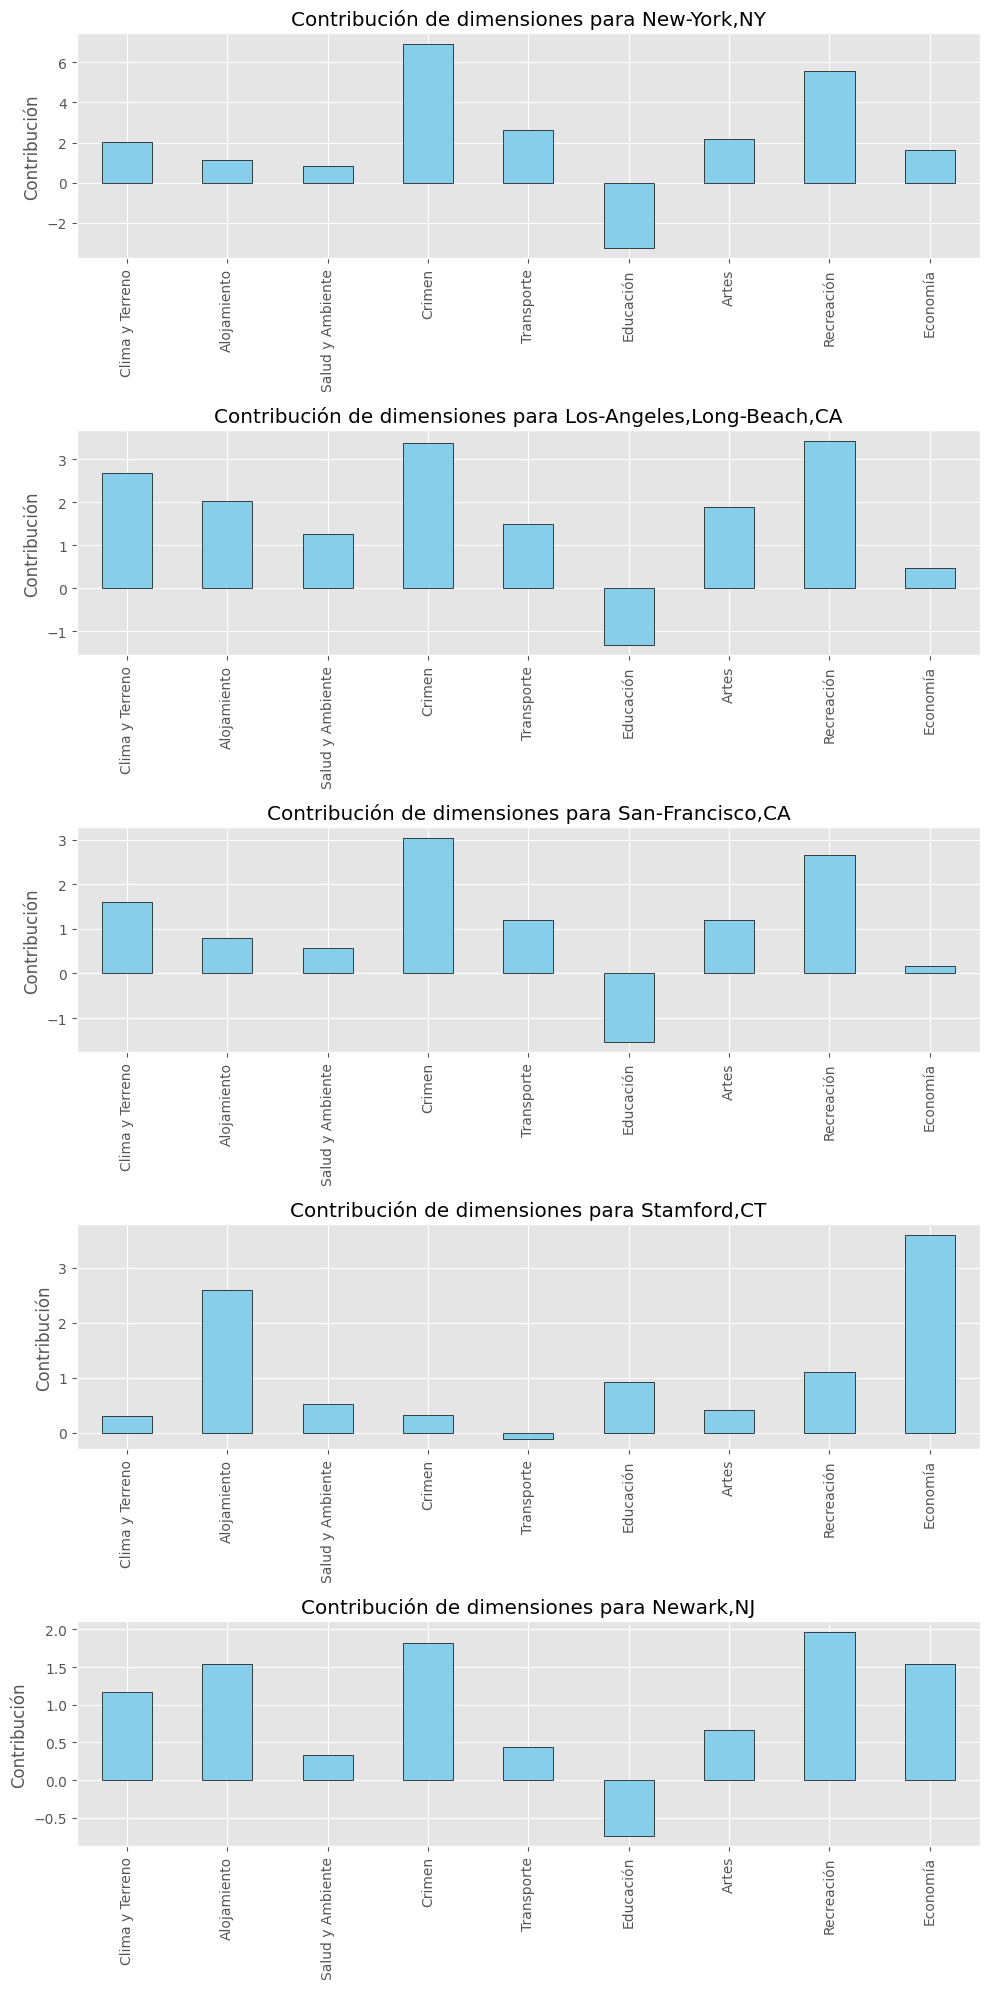

In [27]:
specific_loadings = loadings.T.dot(principal_components.loc[top_cities.index].T)
specific_loadings

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

for i, city in enumerate(specific_loadings.columns):
    ax = axes[i]
    specific_loadings[city].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Contribución de dimensiones para {city}')
    ax.set_ylabel('Contribución')
    ax.grid(True)

plt.tight_layout()
plt.show()

### Procedimiento

1. Cálculo del Puntaje General:
   - Componentes Principales: Se seleccionaron los componentes principales que capturan la mayor parte de la varianza de los datos (en este caso, los primeros cuatro componentes principales).
   - Puntaje General: Se calculó un puntaje general para cada ciudad multiplicando las puntuaciones de cada ciudad en los componentes seleccionados por la proporción de varianza explicada por esos componentes. Luego, se sumaron estas puntuaciones ponderadas para obtener un puntaje general.
   - Selección de Ciudades: Las cinco ciudades con los puntajes generales más altos se seleccionaron como las ciudades con calidad de vida inusualmente alta.

2. Visualización de la Distribución de Puntajes:
   - Diagrama de Caja: Se visualizó la distribución de los puntajes generales de todas las ciudades utilizando un diagrama de caja. Las cinco ciudades seleccionadas se destacaron en este gráfico para mostrar qué tan inusuales son en comparación con el resto de la muestra.
   
3. Cálculo de Cargas Específicas (Specific Loadings):
   - Multiplicación de Matrices: Se calculó la contribución de cada criterio (como Clima, Alojamiento, Crimen, etc.) a los puntajes generales de las cinco ciudades seleccionadas. Esto se hizo multiplicando la matriz de loadings (que muestra la contribución de cada criterio a cada componente principal) por las puntuaciones de los componentes principales de las cinco ciudades seleccionadas.
   
4. Visualización de Contribuciones por Ciudad:
   - Gráfico de Barras: Para cada una de las cinco ciudades, se creó un gráfico de barras que muestra cómo cada criterio contribuye al puntaje general. Esto permite identificar las dimensiones específicas que impulsan la alta calidad de vida en cada ciudad.

### Análisis

Distribución de la Calidad de Vida:
   - Las cinco ciudades seleccionadas (New York, Los Angeles, San Francisco, Stamford, Newark) tienen puntajes generales significativamente más altos que la mayoría de las otras ciudades en la muestra. Esto se visualiza claramente en el diagrama de caja, donde estas ciudades aparecen como outliers.

Dimensiones Clave por Ciudad:
   - New York, NY: La dimensión de "Crimen" tiene una contribución sorprendentemente alta, lo que sugiere que a pesar de tener problemas de seguridad, otras dimensiones como "Recreación" y "Transporte" compensan estos desafíos.
   - Los Angeles, CA: Al igual que New York, "Crimen" y "Recreación" son dimensiones importantes, lo que puede indicar que estas ciudades ofrecen una alta calidad de vida en términos de oportunidades recreativas, a pesar de los problemas de seguridad.
   - San Francisco, CA: Similar a las otras dos, "Crimen" y "Recreación" dominan, pero con una menor contribución de "Economía", lo que sugiere un equilibrio diferente en los factores que impulsan la calidad de vida.
   - Stamford, CT: La "Economía" y el "Alojamiento" juegan un papel más importante aquí, lo que sugiere una combinación de prosperidad económica y un mercado de vivienda menos asequible.
   - Newark, NJ: También destaca la "Economía", junto con "Alojamiento", lo que sugiere que, aunque la ciudad puede tener desafíos, su desarrollo económico es un fuerte impulsor de la calidad de vida.

### Conclusiones

- Inusualidad: Las cinco ciudades seleccionadas son inusuales porque son claramente excepcionales en términos de calidad de vida en comparación con la muestra general.

Dimensiones Determinantes: Las dimensiones que más contribuyen a la calidad de vida en estas ciudades varían, pero generalmente incluyen factores como "Crimen", "Recreación" y "Economía". Es interesante notar que, aunque "Crimen" normalmente es una dimensión negativa, su alto puntaje en estas ciudades puede estar indicando una paradoja, donde las ciudades con más actividad y oportunidades también enfrentan más desafíos de seguridad.

- Implicaciones: Este análisis demuestra que la calidad de vida es un constructo complejo, y las ciudades pueden tener alta calidad de vida a través de una variedad de combinaciones de fortalezas y debilidades en cada uno de estos factores clave. Por ejemplo, una ciudad puede hacer frente a los problemas de seguridad ofreciendo amplias oportunidades recreativas o culturales.

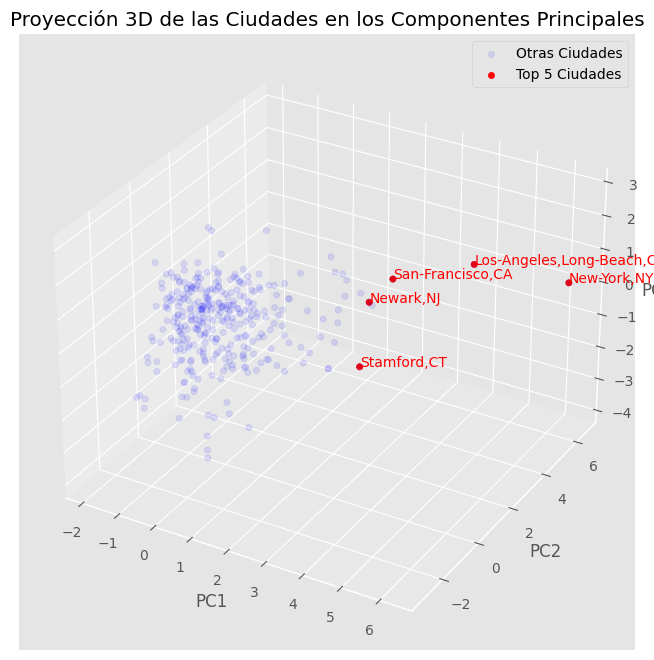

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configurar la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar las ciudades con alpha bajo
ax.scatter(principal_components['PC1'], 
           principal_components['PC2'], 
           principal_components['PC3'], 
        #    s=principal_components['PC4']*100, # Escalar el tamaño de los puntos
           color='blue', 
           alpha=0.1, 
           label='Otras Ciudades')

# Graficar las 5 mejores ciudades con color destacado
ax.scatter(principal_components.loc[top_cities.index, 'PC1'], 
           principal_components.loc[top_cities.index, 'PC2'], 
           principal_components.loc[top_cities.index, 'PC3'], 
        #    s=principal_components.loc[top_cities.index, 'PC4'], 
           color='red', 
           alpha=1.0, 
           label='Top 5 Ciudades')

# Añadir etiquetas a las mejores ciudades
for city in top_cities.index:
    ax.text(principal_components.loc[city, 'PC1'], 
            principal_components.loc[city, 'PC2'], 
            principal_components.loc[city, 'PC3'], 
            city, color='red', fontsize=10)

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Título y leyenda
ax.set_title('Proyección 3D de las Ciudades en los Componentes Principales')
ax.legend()

# Mostrar el gráfico
plt.show()

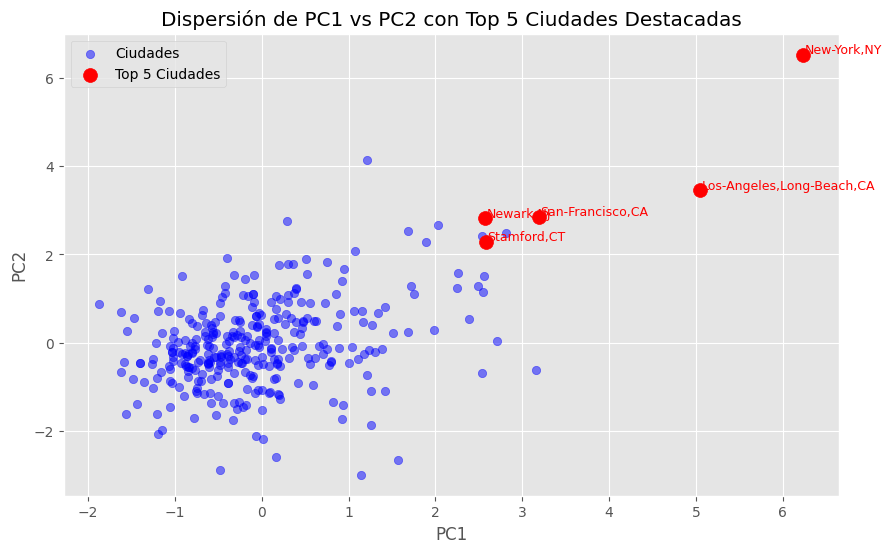

In [31]:
# Crear la gráfica de dispersión para todas las ciudades
plt.figure(figsize=(10, 6))
plt.scatter(principal_components['PC1'], principal_components['PC2'], color='blue', alpha=0.5, label='Ciudades')

# Destacar las 5 mejores ciudades
plt.scatter(principal_components.loc[top_cities.index, 'PC1'], 
            principal_components.loc[top_cities.index, 'PC2'], 
            color='red', s=100, label='Top 5 Ciudades')

# Añadir etiquetas a las ciudades destacadas
for city in top_cities.index:
    plt.text(principal_components.loc[city, 'PC1'] + 0.02, 
             principal_components.loc[city, 'PC2'] + 0.02, 
             city, fontsize=9, color='red')

# Configurar la gráfica
plt.title('Dispersión de PC1 vs PC2 con Top 5 Ciudades Destacadas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


### 6.   PRUEBA DE CÁLCULO CON PCA.

In [28]:
# PRUEBA DE CALCULO CORRECTO DEL PCA

from pca import pca

model = pca(n_components=9)
dataset_pca = model.fit_transform(Z, verbose=False)
print('Loadings usando PCA')
display(dataset_pca['loadings'])

print('Loadings usando AL')
display(loadings)
# display(dataset_pca['PC'])

# fig, ax = model.biplot(legend=False, color_arrow="red", arrowdict={'color_text':"black"})

Loadings usando PCA


,Clima y Terreno,Alojamiento,Salud y Ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
PC1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
PC2,-0.217835,-0.250624,0.299465,-0.355342,0.179604,0.483382,0.194790,-0.384475,-0.471283
PC3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
PC4,-0.137321,-0.511829,-0.014702,0.539050,0.302904,-0.335411,0.101080,0.189801,-0.421770
PC5,-0.369150,0.233488,-0.103241,-0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
PC6,0.374605,-0.141640,-0.373848,0.080923,0.467592,0.502170,-0.461881,0.089916,0.032608
PC7,-0.084706,-0.230639,0.013868,0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
PC8,-0.362308,0.613855,-0.185676,0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
PC9,-0.001391,-0.013600,0.716355,0.058608,-0.003629,-0.110840,-0.685758,0.025506,-0.000438


Loadings usando AL


,Clima y Terreno,Alojamiento,Salud y Ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
PC1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
PC2,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
PC3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
PC4,0.137321,0.511829,0.014702,-0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
